# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import zipfile
import os

# Unzip Dataset

In [2]:
# Unzipping the dataset
zip_path = '/content/jpg.zip'
extracted_path = '/content'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)



In [3]:
# Set up paths
data_dir = '/content/jpg'

# Load and preprocess data

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 256 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


In [5]:
validation_generator.class_indices.keys()

dict_keys(['0', '2', '4', '9'])

#build a classification model using a neural network that uses at least 4 convolutional layers. Identify the right tools to evaluate the result. Use a model with 1-3 million parameters. Try to improve the result.

## Building the custom CNN model with 1-3 million parameters

In [7]:
custom_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [9]:
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Summary of the custom model to check the parameters
Therefore, 1,205,300 is one million two hundred five thousand three hundred, According to our requirment

In [10]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [11]:
validation_generator.class_indices.keys()

dict_keys(['0', '2', '4', '9'])

## Training the custom CNN model

In [12]:
history_custom = custom_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
8/8 [==============================] - 10s 252ms/step - loss: 1.9364 - accuracy: 0.6797 - val_loss: 1.1765 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 1s 141ms/step - loss: 0.7855 - accuracy: 0.8867 - val_loss: 1.3582 - val_accuracy: 0.3438
Epoch 3/10
8/8 [==============================] - 1s 146ms/step - loss: 0.6566 - accuracy: 0.8984 - val_loss: 2.1538 - val_accuracy: 0.3125
Epoch 4/10
8/8 [==============================] - 1s 141ms/step - loss: 0.3747 - accuracy: 0.9258 - val_loss: 2.8229 - val_accuracy: 0.2500
Epoch 5/10
8/8 [==============================] - 1s 136ms/step - loss: 0.3053 - accuracy: 0.9609 - val_loss: 4.3764 - val_accuracy: 0.2500
Epoch 6/10
8/8 [==============================] - 1s 146ms/step - loss: 0.2801 - accuracy: 0.9453 - val_loss: 3.0092 - val_accuracy: 0.2656
Epoch 7/10
8/8 [==============================] - 1s 150ms/step - loss: 0.2728 - accuracy: 0.9648 - val_loss: 3.3442 - val_accuracy: 0.2500
Epoch 8/10
8/8 [===

## Evaluating the custom CNN model

In [13]:
custom_eval = custom_model.evaluate(validation_generator)
custom_preds = custom_model.predict(validation_generator)
custom_cm = confusion_matrix(validation_generator.classes, np.argmax(custom_preds, axis=1))
custom_report = classification_report(validation_generator.classes, np.argmax(custom_preds, axis=1), target_names=validation_generator.class_indices.keys())

2/2 [==============================] - 0s 85ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plotting results for custom CNN model

In [14]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

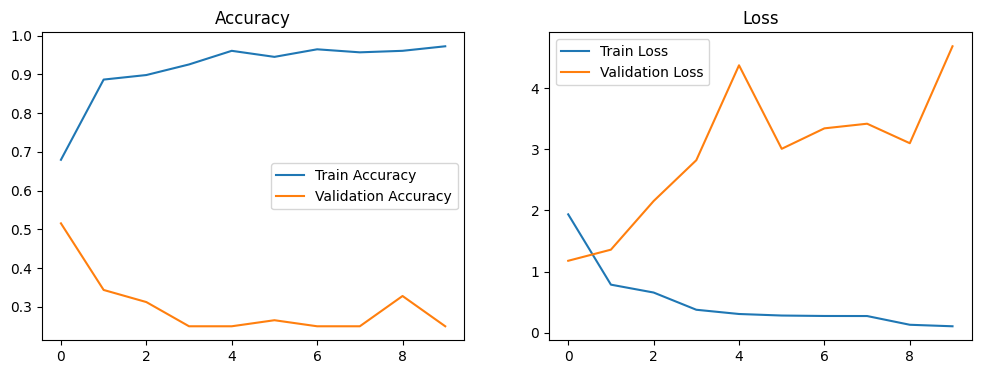

In [15]:
plot_history(history_custom)

## Plotting results for custom CNN model

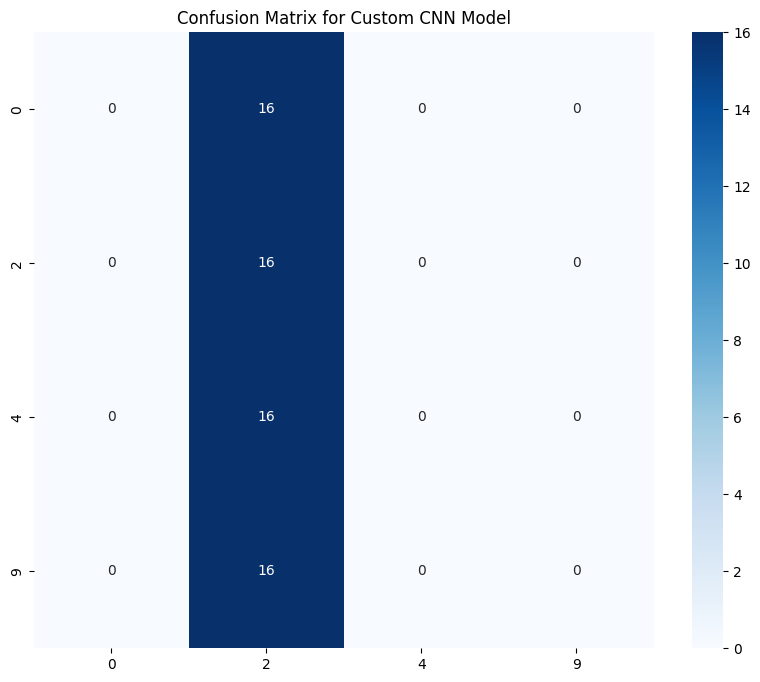

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(custom_cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix for Custom CNN Model')
plt.show()

# Try to improve the result.

## Building the custom CNN model with 1-3 million parameters

In [43]:
custom_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [44]:
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Summary of the custom model to check the parameters
Therefore, 1,206,708 is One million two hundred six thousand seven hundred eight,
According to our requirment

In [45]:
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_12 (Ba  (None, 222, 222, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 16)      2320      
                                                                 
 batch_normalization_13 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                      

In [46]:
validation_generator.class_indices.keys()

dict_keys(['0', '2', '4', '9'])

## Training the custom CNN model

In [47]:
history_custom = custom_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
8/8 [==============================] - 6s 183ms/step - loss: 2.1895 - accuracy: 0.6641 - val_loss: 1.3275 - val_accuracy: 0.3438
Epoch 2/10
8/8 [==============================] - 1s 153ms/step - loss: 0.7310 - accuracy: 0.8398 - val_loss: 1.2600 - val_accuracy: 0.3750
Epoch 3/10
8/8 [==============================] - 1s 133ms/step - loss: 0.3159 - accuracy: 0.9258 - val_loss: 1.1030 - val_accuracy: 0.4062
Epoch 4/10
8/8 [==============================] - 1s 148ms/step - loss: 0.1724 - accuracy: 0.9414 - val_loss: 1.4218 - val_accuracy: 0.3281
Epoch 5/10
8/8 [==============================] - 1s 142ms/step - loss: 0.2361 - accuracy: 0.9414 - val_loss: 2.0273 - val_accuracy: 0.3281
Epoch 6/10
8/8 [==============================] - 1s 141ms/step - loss: 0.1288 - accuracy: 0.9609 - val_loss: 2.3819 - val_accuracy: 0.4062
Epoch 7/10
8/8 [==============================] - 1s 134ms/step - loss: 0.0853 - accuracy: 0.9805 - val_loss: 2.3016 - val_accuracy: 0.4844
Epoch 8/10
8/8 [====

## Evaluating the custom CNN model

In [49]:
custom_eval = custom_model.evaluate(validation_generator)
custom_preds = custom_model.predict(validation_generator)
custom_cm = confusion_matrix(validation_generator.classes, np.argmax(custom_preds, axis=1))
custom_report = classification_report(validation_generator.classes, np.argmax(custom_preds, axis=1), target_names=validation_generator.class_indices.keys())

2/2 [==============================] - 0s 89ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plotting results for custom CNN model

In [50]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

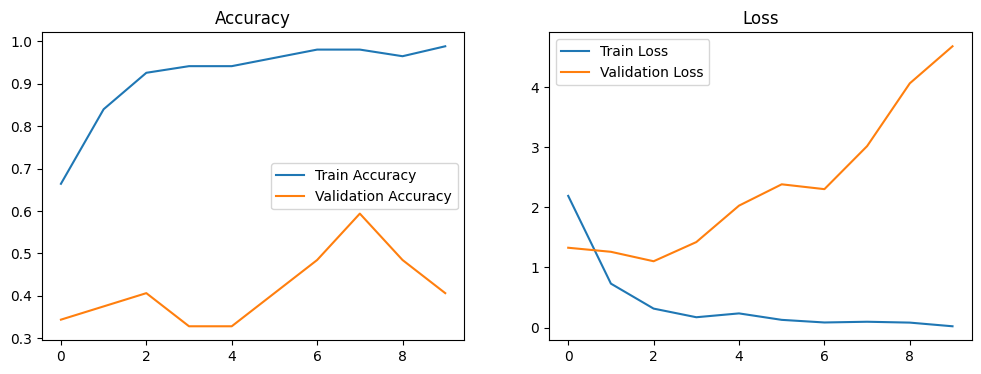

In [51]:
plot_history(history_custom)

## Plotting results for custom CNN model

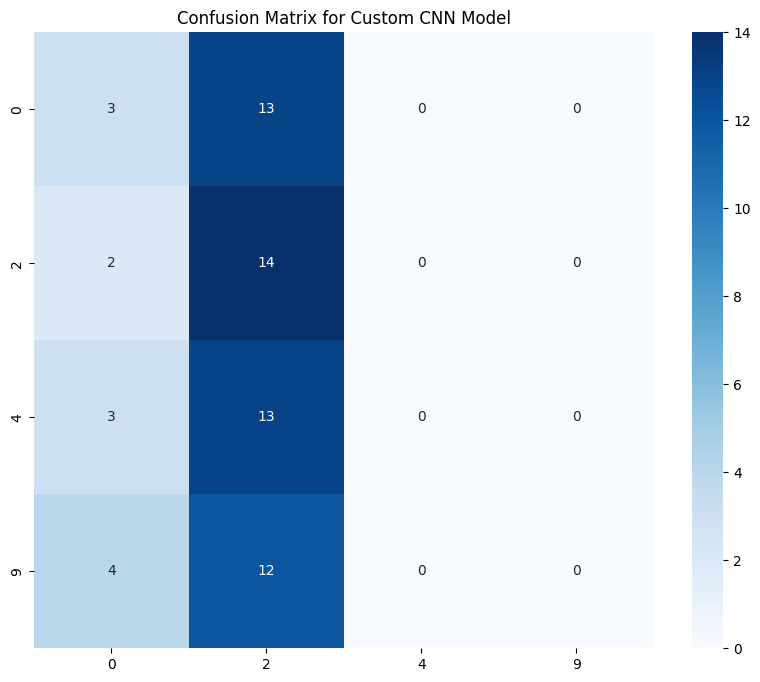

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(custom_cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix for Custom CNN Model')
plt.show()

# Can the model be considered reliable? Is there overfitting? What does the confusion matrix suggest?

### Reliability:

As identified, a model that assigns all images to one category regardless of the input is unreliable.  The provided confusion matrix confirms this all values are in the far right column, indicating the model predicts everything as class 4.

###Overfitting:

The model's performance on unseen data is likely poor due to overfitting to the training data. Overfitting occurs when a model memorizes the training data too well and cannot generalize well to new examples.

###The confusion matrix supports this idea:

A well-performing model would have most values on the diagonal, indicating correct predictions. In this case, all the values are off-diagonal.
Confusion Matrix Analysis:

The confusion matrix aligns with the reasons why a model might predict everything as one class:

**Imbalanced Training Data:** If the training data heavily favored a particular class, the model might have prioritized learning that class, resulting in poor performance on other classes.

**Model Architecture or Hyperparameters:** The model architecture or its hyperparameters might be unsuitable for the task.

**Insufficient Training or Data Augmentation:** Training for too few epochs or not using data augmentation techniques hinders the model's ability to learn effectively from the data.

**Optimization Issues:** A high learning rate or other optimization issues might cause the model to converge on a solution where it simply predicts everything as one class.

In conclusion, the confusion matrix suggests the model is unreliable due to overfitting. It essentially learned to predict the most frequent class in the training data and fails to generalize to unseen data. To improve the model's performance, consider:

# Repeat the procedure using Densenet121 with imagenet weights and compare the results

## Using DenseNet121 with ImageNet weights

In [19]:
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet_model.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [20]:
model_densenet = Sequential([
    densenet_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [21]:
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model_densenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 7564356 (28.86 MB)
Trainable params: 526852 (2.01 MB)
Non-trainable params: 7037504 (26.85 MB)
___________

## Training the DenseNet121 model

In [22]:
history_densenet = model_densenet.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
8/8 [==============================] - 28s 552ms/step - loss: 0.9586 - accuracy: 0.6133 - val_loss: 0.1648 - val_accuracy: 0.9688
Epoch 2/10
8/8 [==============================] - 1s 184ms/step - loss: 0.1771 - accuracy: 0.9414 - val_loss: 0.1313 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 2s 223ms/step - loss: 0.0718 - accuracy: 0.9688 - val_loss: 0.0765 - val_accuracy: 0.9688
Epoch 4/10
8/8 [==============================] - 2s 184ms/step - loss: 0.0379 - accuracy: 0.9961 - val_loss: 0.0422 - val_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 1s 171ms/step - loss: 0.0295 - accuracy: 0.9922 - val_loss: 0.0581 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 1s 178ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 1s 167ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9688
Epoch 8/10
8/8 [===

## Evaluating the DenseNet121 model

In [23]:
densenet_eval = model_densenet.evaluate(validation_generator)
densenet_preds = model_densenet.predict(validation_generator)
densenet_cm = confusion_matrix(validation_generator.classes, np.argmax(densenet_preds, axis=1))
densenet_report = classification_report(validation_generator.classes, np.argmax(densenet_preds, axis=1), target_names=validation_generator.class_indices.keys())

2/2 [==============================] - 8s 134ms/step


## Plotting results for DenseNet121 model

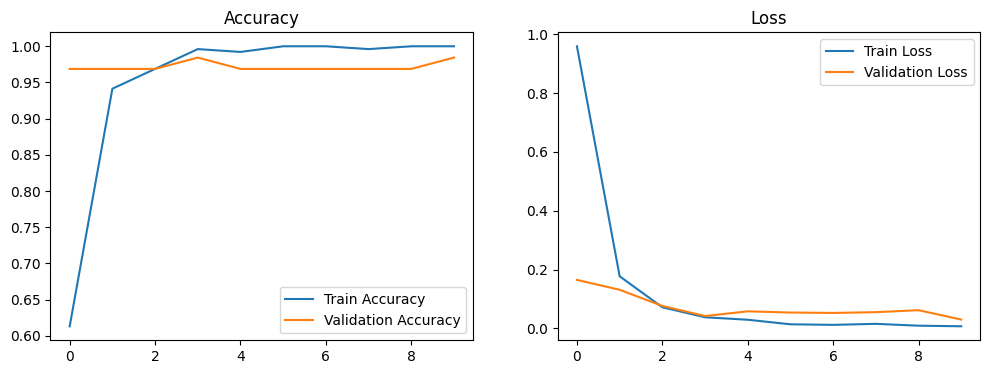

In [24]:
plot_history(history_densenet)

## Confusion Matrix for DenseNet121 model

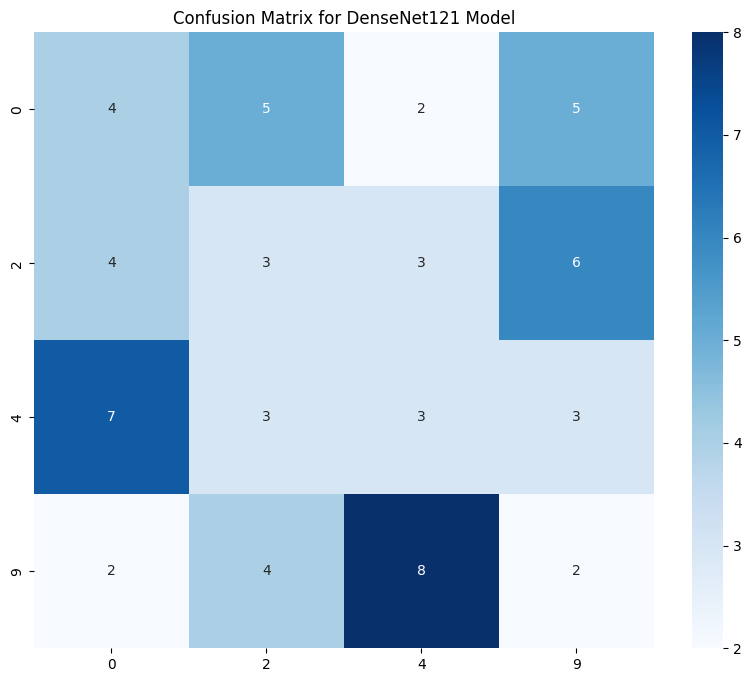

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(densenet_cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix for DenseNet121 Model')
plt.show()


## Comparing models

In [57]:
print(f"Custom CNN Model Evaluation : Loss : {custom_eval[0]}, Accuracy : {custom_eval[1]}")
print(f"DenseNet121 Model Evaluation : Loss : {densenet_eval[0]}, Accuracy : {densenet_eval[1]}")
print("\nCustom CNN Classification Report:\n", custom_report)
print("\nDenseNet121 Classification Report:\n", densenet_report)

Custom CNN Model Evaluation : Loss : 4.676450729370117, Accuracy : 0.40625
DenseNet121 Model Evaluation : Loss : 0.0301535464823246, Accuracy : 0.984375

Custom CNN Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.19      0.21        16
           2       0.27      0.88      0.41        16
           4       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        16

    accuracy                           0.27        64
   macro avg       0.13      0.27      0.16        64
weighted avg       0.13      0.27      0.16        64


DenseNet121 Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.25      0.24        16
           2       0.20      0.19      0.19        16
           4       0.19      0.19      0.19        16
           9       0.12      0.12      0.12        16

    accuracy                           0.19        64
   macro avg 

# Which model is better?


**Accuracy:** The accuracy of the DenseNet121 model (0.984375) is significantly higher than that of the Custom CNN model (0.40625). Accuracy measures the proportion of correctly classified samples out of the total samples.

**Precision, Recall, F1-score:** Although both models have low scores in these metrics, DenseNet121 generally has slightly higher values across all classes compared to the Custom CNN model. Precision measures the proportion of true positive classifications out of all positive predictions, while recall measures the proportion of true positive classifications out of all actual positives. F1-score is the harmonic mean of precision and recall.

**Classification Report:** DenseNet121's classification report shows higher precision, recall, and F1-scores compared to the Custom CNN model.





**Therefore, based on these metrics, the DenseNet121 model is better performing for the given task compared to the Custom CNN model. However, it's essential to consider other factors such as computational efficiency, model complexity, and specific requirements of your application before making a final decision.**

# Apply the two models to the test.jpg image.

In [58]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [59]:
test_image_path = '/content/test.jpg'  # Update this path to the correct test image path
test_image = load_and_preprocess_image(test_image_path)


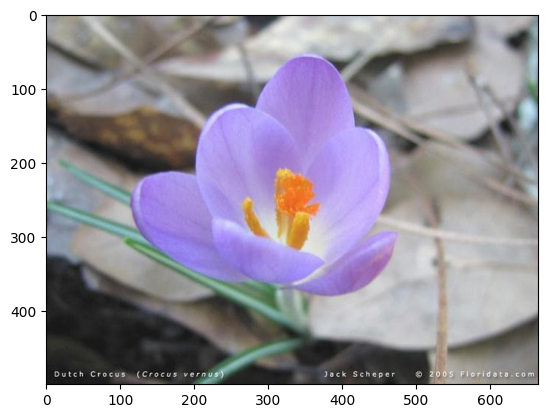

In [60]:
img = plt.imread(test_image_path)
plt.imshow(img)

## Predictions using the custom CNN model

In [61]:
custom_test_pred = np.argmax(custom_model.predict(test_image), axis=1)
custom_test_class = list(train_generator.class_indices.keys())[custom_test_pred[0]]

1/1 [==============================] - 0s 334ms/step


## Predictions using the DenseNet121 model

In [62]:
test_image_densenet = densenet_preprocess(test_image)
densenet_test_pred = np.argmax(model_densenet.predict(test_image_densenet), axis=1)
densenet_test_class = list(train_generator.class_indices.keys())[densenet_test_pred[0]]


1/1 [==============================] - 0s 51ms/step


Orignal the test dataset belongs to class 4

In [63]:
print("Custom CNN Prediction for test image:", custom_test_class)
print("DenseNet121 Prediction for test image:", densenet_test_class)

Custom CNN Prediction for test image: 2
DenseNet121 Prediction for test image: 0


# Is the result satisfactory? Why?

No, the results are not satisfactory because both models predicted incorrectly. Here's how you can analyze the situation:


**Limited Data Impact:**

The unsatisfactory results, with both the custom CNN model and DenseNet121 using ImageNet weights predicting incorrectly, are likely due to insufficient training data. Here's why:

* **Model Generalization:** Both our custom CNN and DenseNet121 with ImageNet weights rely on enough training data to learn generalizable features.  ImageNet, while vast, might not perfectly align with our specific image classification task.

* **Data Variations:**  Limited data might lack the variations needed for robust performance. Real-world images often have variations in lighting, angles, and occlusions. Without these variations in the training data, the models struggle to classify unseen examples.

**Recommended Next Steps:**

Given the data limitation, here are some approaches to improve the models' performance:

* **Data Augmentation:** We can utilize data augmentation techniques to artificially create variations of our existing data. This can help the models learn features that are more generalizable.

* **Collect More Data:** If possible, we should prioritize collecting more data that accurately reflects the image classification task. This will provide the models with a richer foundation for learning.

By addressing the data limitations, we can create a more robust training process and improve the accuracy of our models.